# Eksempel
---

Notebook med eksempel av appen.

(<matplotlib.image.AxesImage at 0x15a7a864e08>, (852, 847, 4))

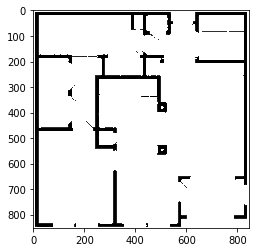

In [9]:
from web.RouterPlacer import *
img = plt.imread("floorplans_processed/01.png", "gray") 
# img = plt.imread("floorplans_processed/00_2.png", "gray")
# img = plt.imread("testrom4.png", "gray")
# img = plt.imread("floorplans_processed/02.png", "gray")
# img = plt.imread("floorplans_processed/03.png", "gray")
# img = plt.imread("floorplans_processed/04.png", "gray")
# img = plt.imread("floorplans_processed/open_square.png", "gray")
plt.imshow(img), img.shape

In [10]:
from wifi_matrix import parse_image_file

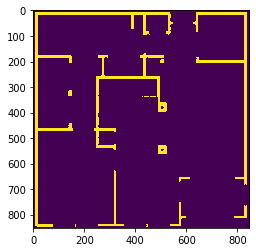

In [11]:
plt.imshow(np.abs(parse_image_file(img, 1, 1+0.15j)))

Nå lager vi en instanse av routerPlacer, og henter all nødvendig informasjon.

In [12]:
routerPlacer = RouterPlacer(img, id= "01_step_function")
routerPlacer.get_optimal_solution()

Padding with  (1+0.06122448654472401j)
Padding with  (1+0.24489794617889604j)
Padding with  (1+0.5510204010250028j)
Padding with  (1+0.9795917847155842j)
Padding with  (1+1.5306122742305348j)
Padding with  (1+2.2040816041000113j)
Padding with  (1+2.999999892310612j)
Optimal coordinates not found. Getting new results
LU-decomposition not found. Getting new.
Setting up matrix.
Setting up matrix took 11.34s
Fetching LU-decomposition.
LU-decomposition took 133.86s
Got gauss-distributed points. Now checking 361 points
Getting solutions took 166.49s
Optimal position: (179, 341)


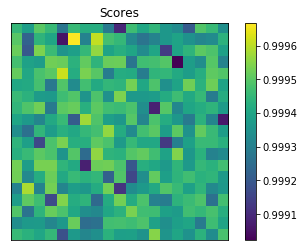

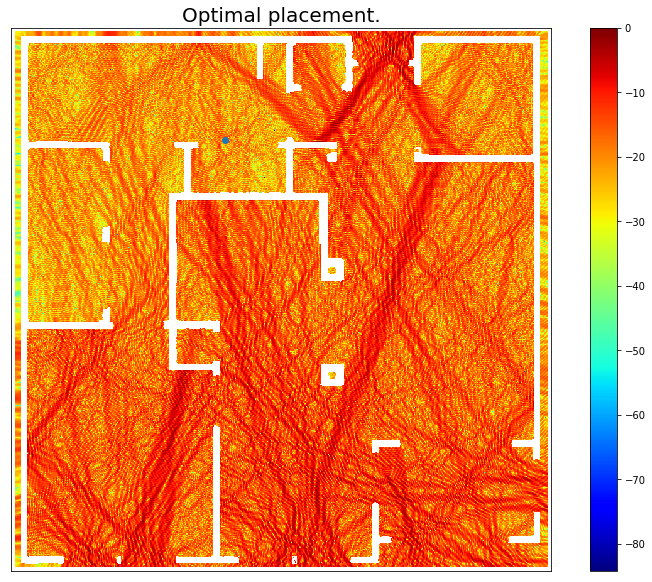

In [13]:
routerPlacer.score_plot()
routerPlacer.solution_plot()


***

## Sammenlikning med plassering i midten

In [31]:
from wifi_matrix import solve_single_system, plot_single_solution
from score import step_score
from find_optimal import convolve_solution

In [47]:
x0, y0 = routerPlacer.img.shape
x0 =(x0-1)//2 
y0 = (y0-1)//2

In [48]:
middle_solution = solve_single_system(routerPlacer.lu, x0, y0, routerPlacer.img.shape)
middle_solution = convolve_solution(middle_solution, routerPlacer.img.shape)
middle_score = step_score(middle_solution, routerPlacer.img)

In [49]:
middle_score, routerPlacer.optimal_score

(5.083733285229216e-12, 5.270021934297651e-12)

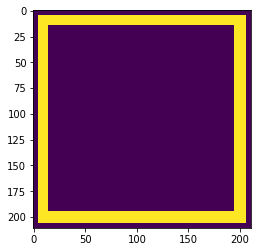

In [50]:
plt.imshow(np.abs(routerPlacer.img))

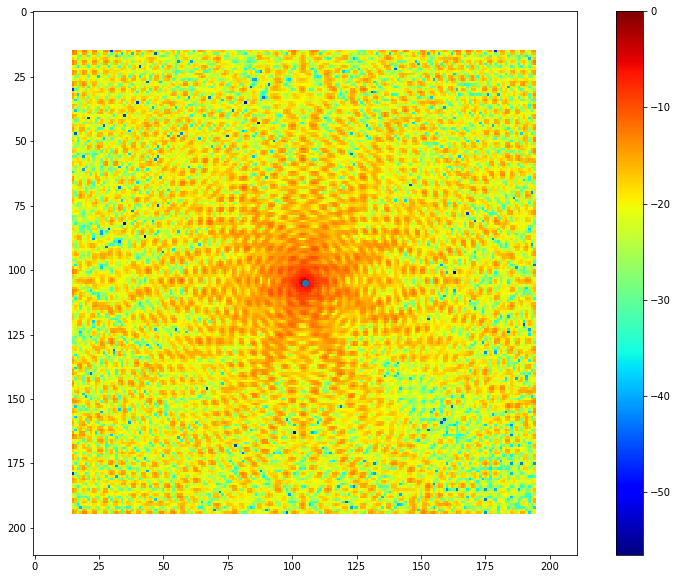

In [51]:
plot_single_solution(middle_solution, x0, y0, routerPlacer.img)